## 2004 & 2024 NBA Analysis

In [2]:
# import needed libraries
from nba_api.stats.endpoints import leaguedashteamstats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import time
import os

# 防止中文乱码（设置中文字体）
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei' 
matplotlib.rcParams['axes.unicode_minus'] = False

In [30]:
# Functions

# Function to get the data we need for a specific season
def get_season_team_data(season):
    stats = leaguedashteamstats.LeagueDashTeamStats(
        season=season,
        season_type_all_star='Regular Season',
        measure_type_detailed_defense='Base'
    )

    df = stats.get_data_frames()[0]
    res_df = df[[col for col in df.columns if not col.endswith('_RANK')]].copy()
    res_df['3P%'] = df['FG3M'] / df['FG3A']
    res_df['2P%'] = (df['FGM'] - df['FG3M']) / (df['FGA'] - df['FG3A'])
    res_df['3P_ratio'] = df['FG3A'] / df['FGA']
    res_df['2P_ratio'] = (df['FGA'] - df['FG3A']) / df['FGA']
    res_df['WinRate'] = df['W'] / df['GP']
    
    return res_df

# 回归分析函数
def regression_analysis(df, year_label):
    X = df[['3P%', '2P%', '3P_ratio', '2P_ratio']]
    y = df['WinRate']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"\n=== {year_label} 赛季回归结果 ===")
    print(model.summary())
    return model

In [19]:
# get a original data example
stats = leaguedashteamstats.LeagueDashTeamStats(
        season='2003-04',
        season_type_all_star='Regular Season',
        measure_type_detailed_defense='Base'
    )
example_df = stats.get_data_frames()[0]
example_df.to_csv('data/example_data_2003-04.csv')
with pd.option_context('display.max_columns', None, 'display.width', 130):
    print(example_df.head())
print(example_df.loc[0, 'FG3_PCT'])

      TEAM_ID            TEAM_NAME  GP   W   L  W_PCT     MIN   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  \
0  1610612737        Atlanta Hawks  82  28  54  0.341  3981.0  2829  6529   0.433   419  1249    0.335  1534  1976   0.776   
1  1610612738       Boston Celtics  82  36  46  0.439  3941.0  2843  6415   0.443   553  1599    0.346  1572  2095   0.750   
2  1610612741        Chicago Bulls  82  23  59  0.280  3966.0  2798  6753   0.414   429  1256    0.342  1330  1834   0.725   
3  1610612739  Cleveland Cavaliers  82  35  47  0.427  3971.0  2922  6753   0.433   247   786    0.314  1528  2030   0.753   
4  1610612742     Dallas Mavericks  82  52  30  0.634  3961.0  3322  7230   0.459   507  1456    0.348  1475  1854   0.796   

   OREB  DREB   REB   AST     TOV  STL  BLK  BLKA    PF  PFD   PTS  PLUS_MINUS  GP_RANK  W_RANK  L_RANK  W_PCT_RANK  MIN_RANK  \
0   996  2507  3503  1648  1350.0  627  408   416  1826    3  7611      -381.0        1      25      25          2

In [33]:
# get the data we need
data_2004 = get_season_team_data('2003-04')
time.sleep(1.5) # 防止请求过快
data_2005 = get_season_team_data('2004-05')
time.sleep(1.5) 
data_2006 = get_season_team_data('2005-06')
time.sleep(1.5) 
data_2007 = get_season_team_data('2006-07') 
time.sleep(1.5) 
data_2008 = get_season_team_data('2007-08')
time.sleep(1.5) 
data_2009 = get_season_team_data('2008-09')
time.sleep(1.5) 
data_2010 = get_season_team_data('2009-10')
time.sleep(1.5) 
data_2011 = get_season_team_data('2010-11')
time.sleep(1.5) 
data_2012 = get_season_team_data('2011-12')
time.sleep(1.5) 
data_2013 = get_season_team_data('2012-13')
time.sleep(1.5) 
data_2014 = get_season_team_data('2013-14')
time.sleep(1.5) 
data_2015 = get_season_team_data('2014-15')
time.sleep(1.5) 
data_2016 = get_season_team_data('2015-16')
time.sleep(1.5) 
data_2017 = get_season_team_data('2016-17')
time.sleep(1.5) 
data_2018 = get_season_team_data('2017-18')
time.sleep(1.5) 
data_2019 = get_season_team_data('2018-19')
time.sleep(1.5) 
data_2020 = get_season_team_data('2019-20')
time.sleep(1.5) 
data_2021 = get_season_team_data('2020-21')
time.sleep(1.5) 
data_2022 = get_season_team_data('2021-22')
time.sleep(1.5) 
data_2023 = get_season_team_data('2022-23')
time.sleep(1.5) 
data_2024 = get_season_team_data('2023-24')
time.sleep(1.5) 

In [34]:
print(data_2004.head())

      TEAM_ID            TEAM_NAME  GP   W   L  W_PCT     MIN   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   REB   AST     TOV  STL  BLK  BLKA    PF  PFD   PTS  \
0  1610612737        Atlanta Hawks  82  28  54  0.341  3981.0  2829  6529   0.433   419  1249    0.335  1534  1976   0.776   996  2507  3503  1648  1350.0  627  408   416  1826    3  7611   
1  1610612738       Boston Celtics  82  36  46  0.439  3941.0  2843  6415   0.443   553  1599    0.346  1572  2095   0.750   851  2440  3291  1683  1332.0  770  331   408  1837    2  7811   
2  1610612741        Chicago Bulls  82  23  59  0.280  3966.0  2798  6753   0.414   429  1256    0.342  1330  1834   0.725  1048  2519  3567  1793  1321.0  659  396   446  1911    3  7355   
3  1610612739  Cleveland Cavaliers  82  35  47  0.427  3971.0  2922  6753   0.433   247   786    0.314  1528  2030   0.753  1118  2619  3737  1808  1216.0  585  537   434  1743    2  7619   
4  1610612742     Dallas Mavericks  82  52  3

In [35]:
save_path = "data/1y" # 1 year 1 data
os.makedirs(save_path, exist_ok=True)  # 如果目录不存在就创建

# 然后再保存文件
data_2004.to_csv('data/1y/2004_NBA_data.csv')
data_2005.to_csv('data/1y/2005_NBA_data.csv')
data_2006.to_csv('data/1y/2006_NBA_data.csv')
data_2007.to_csv('data/1y/2007_NBA_data.csv')
data_2008.to_csv('data/1y/2008_NBA_data.csv')
data_2009.to_csv('data/1y/2009_NBA_data.csv')
data_2010.to_csv('data/1y/2010_NBA_data.csv')
data_2011.to_csv('data/1y/2011_NBA_data.csv')
data_2012.to_csv('data/1y/2012_NBA_data.csv')
data_2013.to_csv('data/1y/2013_NBA_data.csv')
data_2014.to_csv('data/1y/2014_NBA_data.csv')
data_2015.to_csv('data/1y/2015_NBA_data.csv')
data_2016.to_csv('data/1y/2016_NBA_data.csv')
data_2017.to_csv('data/1y/2017_NBA_data.csv')
data_2018.to_csv('data/1y/2018_NBA_data.csv')
data_2019.to_csv('data/1y/2019_NBA_data.csv')
data_2020.to_csv('data/1y/2020_NBA_data.csv')
data_2021.to_csv('data/1y/2021_NBA_data.csv')
data_2022.to_csv('data/1y/2022_NBA_data.csv')
data_2023.to_csv('data/1y/2023_NBA_data.csv')
data_2024.to_csv('data/1y/2024_NBA_data.csv')

In [36]:
save_path = "data/5y" # 5 year 1 data
os.makedirs(save_path, exist_ok=True)  # 如果目录不存在就创建

data_2005_2009 = pd.concat([data_2005, data_2006, data_2007, data_2008, data_2009], ignore_index=True)
data_2005_2009.to_csv('data/5y/2005-2009_NBA_data.csv')
data_2010_2014 = pd.concat([data_2010, data_2011, data_2012, data_2013, data_2014], ignore_index=True)
data_2010_2014.to_csv('data/5y/2010-2014_NBA_data.csv')
data_2015_2019 = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019], ignore_index=True)
data_2015_2019.to_csv('data/5y/2015-2019_NBA_data.csv')
data_2020_2024 = pd.concat([data_2020, data_2021, data_2022, data_2023, data_2024], ignore_index=True)
data_2020_2024.to_csv('data/5y/2020-2024_NBA_data.csv')


=== 2004 赛季回归结果 ===
                            OLS Regression Results                            
Dep. Variable:                WinRate   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     5.713
Date:                Sun, 13 Apr 2025   Prob (F-statistic):            0.00404
Time:                        16:48:18   Log-Likelihood:                 24.789
No. Observations:                  29   AIC:                            -41.58
Df Residuals:                      25   BIC:                            -36.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9315      0.55

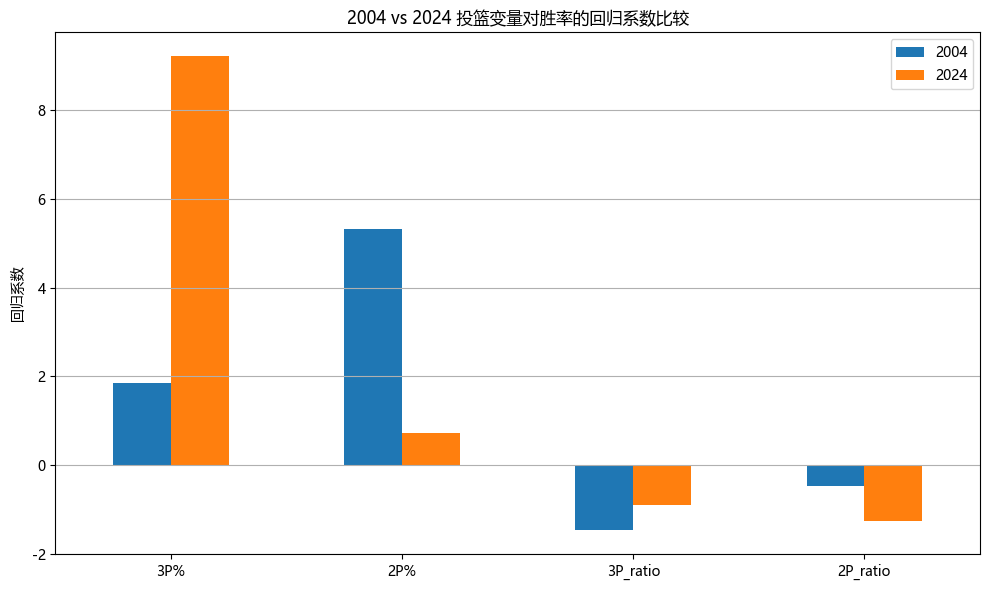

In [ ]:
model_2004 = regression_analysis(data_2004, '2004')
model_2024 = regression_analysis(data_2024, '2024')

# 可视化系数
coefs_2004 = model_2004.params.drop('const')
coefs_2024 = model_2024.params.drop('const')

df_compare = pd.DataFrame({
    '2004': coefs_2004,
    '2024': coefs_2024
})

df_compare.plot(kind='bar', figsize=(10, 6))
plt.title("2004 vs 2024 投篮变量对胜率的回归系数比较")
plt.ylabel("回归系数")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:






# 添加年代标签（2004 为 0，2024 为 1）
data_2004['Era'] = 0
data_2024['Era'] = 1

data_all = pd.concat([data_2004, data_2024], ignore_index=True)

# 构建带交互项的回归模型公式
formula = (
    'WinRate ~ Q("3P%") + Q("2P%") + Q("3P_ratio") + Q("2P_ratio") + Era + '
    'Q("3P%"):Era + Q("2P%"):Era + Q("3P_ratio"):Era + Q("2P_ratio"):Era'
)

model = smf.ols(formula=formula, data=data_all).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                WinRate   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     11.30
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.52e-08
Time:                        16:48:18   Log-Likelihood:                 56.605
No. Observations:                  59   AIC:                            -97.21
Df Residuals:                      51   BIC:                            -80.59
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9315      0.50

In [4]:
data_all.to_csv('2004_2024_NBA_data.csv')